In [30]:
import numpy as np
import fractions
from sympy.matrices import Matrix as SyMatrix
from scipy.optimize import curve_fit
#np.set_printoptions(precision=16)
import matplotlib.pyplot as plt

In [31]:
def mean_solved_time_numpy(n):
    # create the whole matrix
    link = -1/3. # this true for all prisms

    # ones down the diagonal
    matrix = np.diag(np.ones(2*n))

    # near diagonal is almost full.
    near_diagonal = np.repeat(link, 2*n-1)
    near_diagonal[n-1] = 0
    matrix += np.diag(near_diagonal, -1)
    matrix += np.diag(near_diagonal,  1)

    # fill out the near diagonal overflow
    matrix[0, n-1] = link
    matrix[n-1, 0] = link
    matrix[n, 2*n-1] = link
    matrix[2*n-1, n] = link

    # add in the prism diagonals
    prism_diagonal = np.repeat(link, n)
    matrix += np.diag(prism_diagonal,  n)
    matrix += np.diag(prism_diagonal, -n)

    matrix = matrix[1:,1:]
    vals = np.linalg.solve(matrix, np.ones(2*n-1))
    return vals.sum() / (2.*n)

47
47
[ 0.25003943  0.86357112 -0.21678972]


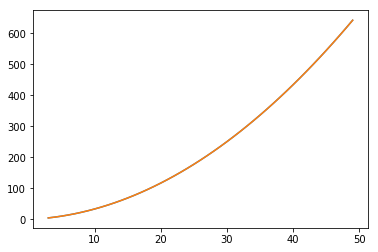

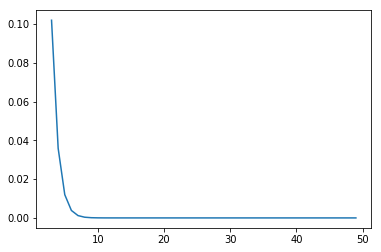

[ nan  nan]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


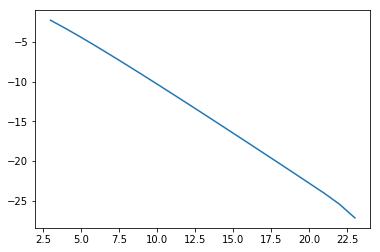

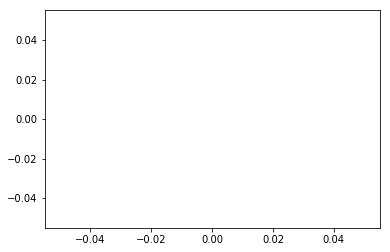

In [3]:
xs = range(3, 50)
ys = [mean_solved_time_numpy(i) for i in xs]

print len(xs)
print len(ys)
plt.plot(xs, ys)

p = np.polyfit(xs, ys, 2)

print p
p[0] = .25
p[1] = np.sqrt(3) / 2
p[2] = -.25

fit_ys = np.polyval(p, xs)

plt.plot(xs, fit_ys)
plt.show()

plt.plot(xs, ys - fit_ys)
plt.show()

log_ys = np.log(ys - fit_ys)
q = np.polyfit(xs, log_ys, 1)
fit_log_ys = np.polyval(q, xs)
print q

plt.plot(xs, log_ys)
plt.plot(xs, fit_log_ys)
plt.show()

plt.plot(xs, log_ys - fit_log_ys)
plt.show()


[  3.91609749e-04  -1.70844992e-02  -4.41381486e-01  -1.30029385e+00]


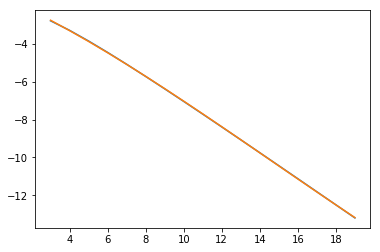

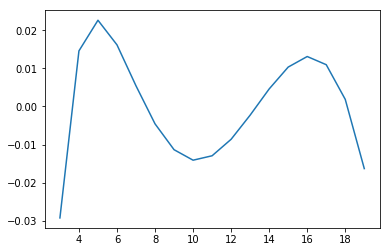

In [9]:
xs = range(3, 20)
ys = [0.5**i - 0.4**i for i in xs]

log_ys = np.log(ys)
q = np.polyfit(xs, log_ys, 3)
fit_log_ys = np.polyval(q, xs)
print q

plt.plot(xs, log_ys)
plt.plot(xs, fit_log_ys)
plt.show()

plt.plot(xs, log_ys - fit_log_ys)
plt.show()


[ -3.18261118 -18.03180659]
[[ inf  inf]
 [ inf  inf]]


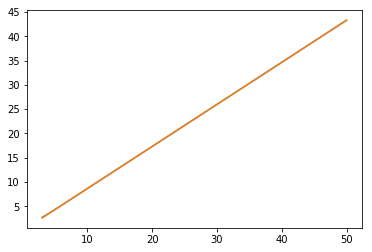

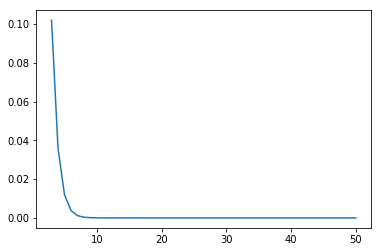

In [48]:
def rational(x, p, q):
    """
    The general rational function description.
    p is a list with the polynomial coefficients in the numerator
    q is a list with the polynomial coefficients (except the first one)
    in the denominator
    The first coefficient of the denominator polynomial is fixed at 1.
    """
    return np.polyval(p, x) / np.polyval([1] + q, x)

def rational5_4(x, p0, p1, p2, p3, p4, p5, q1, q2, q3):
    return rational(x, [p0, p1, p2, p3, p4, p5], [q1, q2, q3])
def rational3_3(x, p0, p1, p2, p3, p4, p5, q1, q2, q3):
    return rational(x, [p0, p1, p2, p3, p4, p5], [q1, q2, q3])
def poly_line (x, p0, p1):
    return p1 * x + p0
def rational_exponential (x, a, b):
    return (x * np.sqrt(3) / 2) / (np.exp(a*x + b) + 1)

fitting_function = rational_exponential

x = np.array([i for i in range(3, 51)])
y = np.array([mean_solved_time_numpy(i) - (i*i - 1)/4. for i in x])
popt, pcov = curve_fit(
    fitting_function, 
    x, y, 
    p0=(-1, -1))
print popt
print pcov

plt.plot(x, y, label='original')
plt.plot(x, fitting_function(x, *popt), label='fit')
plt.show()

plt.plot(x, y - fitting_function(x, *popt))
plt.show()

In [46]:
y_odd = y[::2]
y_even = y[1::2]
np.array(y_odd) - np.array(y_even)

array([-0.8       , -0.85789474, -0.86519115, -0.86594746, -0.86601851,
       -0.86602482, -0.86602535, -0.8660254 , -0.8660254 , -0.8660254 ,
       -0.8660254 , -0.8660254 , -0.8660254 , -0.8660254 , -0.8660254 ,
       -0.8660254 , -0.8660254 , -0.8660254 , -0.8660254 , -0.8660254 ,
       -0.8660254 , -0.8660254 , -0.8660254 , -0.8660254 ])

In [92]:
begin = 3
uptil = 12

def mean_solved_time_sympy(n):
    # create the whole matrix
    link = -1

    # ones down the diagonal
    matrix = np.diag(np.repeat(3, 2*n))

    # near diagonal is almost full.
    near_diagonal = np.repeat(link, 2*n-1)
    near_diagonal[n-1] = 0
    matrix += np.diag(near_diagonal, -1)
    matrix += np.diag(near_diagonal,  1)

    # fill out the near diagonal overflow
    matrix[0, n-1] = link
    matrix[n-1, 0] = link
    matrix[n, 2*n-1] = link
    matrix[2*n-1, n] = link

    # add in the prism diagonals
    prism_diagonal = np.repeat(link, n)
    matrix += np.diag(prism_diagonal,  n)
    matrix += np.diag(prism_diagonal, -n)

    matrix = matrix[1:,1:]
    
    sympy_matrix = SyMatrix(matrix) / 3
    ones = SyMatrix(2*n-1, 1, [1]*(2*n-1))
    
    moves = sympy_matrix.LUsolve(ones)
    #print moves
    return (ones.T * moves)[0, 0] / (2*n)

rationals = [mean_solved_time_sympy(i) for i in range(begin, uptil)]

In [93]:
def lcm(a,b):
    return abs(a * b) / fractions.gcd(a,b) if a and b else 0

def lcm_l(l):
    return reduce(lcm, l, 1)

bigfactor = lcm_l([r.q for r in rationals] + [i**4 for i in range(begin, uptil)])
results = SyMatrix(uptil-begin, 1, [r * bigfactor for r in rationals])
results

Matrix([
[ 196225241640245144845056000],
[ 302687872742931340452480000],
[ 431783426453618935745280000],
[ 582413217208812717146496000],
[ 754147055449848361593600000],
[ 946831523112125129001600000],
[1160415108230610689968896000],
[1394881203362945928094080000],
[1650224605464286530497280000]])

In [94]:
vand = SyMatrix([
    [int(bigfactor * b ** e) 
      for e in range(-3, 5)]
    for b in range(begin, uptil)])
vand

Matrix([
[515432733491581606166528, 1546298200474744885608448, 4638894601424234388389888, 13916683804272703165169664, 41750051412818115924480000, 125250154238454347773440000,  375750462715363043320320000,  1127251388146089129960960000,   3381754164438267389882880000],
[163086138331320748605440,  652344553325282994421760, 2609378213301131977687040, 10437512853204527910748160, 41750051412818115924480000, 167000205651272463697920000,  668000822605089854791680000,  2672003290420359419166720000,  10688013161681437676666880000],
[ 66800082260508979232768,  334000411302544887775232, 1670002056512724573093888,  8350010282563622328598528, 41750051412818115924480000, 208750257064090579622400000, 1043751285320452898112000000,  5218756426602264490560000000,  26093782133011322452800000000],
[ 32214545843223850385408,  193287275059343110701056, 1159723650356058597097472,  6958341902136351582584832, 41750051412818115924480000, 250500308476908695546880000, 1503001850861452173281280000,  90180111051687

In [95]:
vand.LUsolve(results)

Matrix([
[                     36731393893321103721939269514601768945294672382707121590125/887501171848725863740873649696939860225107298845489867328],
[              -34757700421044130598525580978600918303426953658476790417670875/482800637485706869875035265435135283962458370571946487826432],
[              97958571464434285994881348281172892405401970302683683011856625/1931202549942827479500141061740541135849833482287785951305728],
[          -1065609585727725153859824598741611260333325385215843248828429625/61798481598170479344004513975697316347194671433209150441783296],
[234230439574103453710491695033414370665569419781137287115793577041759/77012987153914062717719378905636135251535175383474995912004289122140],
[   1984623398193183996366251583618791168896046492429281805426122970999/4053315113363898037774704152928217644817640809656578732210752059060],
[  7079451156553232835338521086227369156641863385472148853805083055511/25670995717971354239239792968545378417178391794491665304001429707380

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
[0.0, 1.0, 0.99999999999999989, 2.0, 3.0000000000000004, 5.0000000000000009, 8.0000000000000018, 13.000000000000004, 21.000000000000004, 34.000000000000014]
[ 0.4472136   1.61803399 -0.4472136  -0.61803399]
[[  6.66553267e-32  -2.83681280e-32  -2.60156590e-32   3.99485910e-33]
 [ -2.83681280e-32   1.22439951e-32   1.04584127e-32  -6.51703145e-38]
 [ -2.60156590e-32   1.04584127e-32   7.42868917e-30  -4.61105735e-30]
 [  3.99485910e-33  -6.51703145e-38  -4.61105735e-30   1.03216775e-29]]


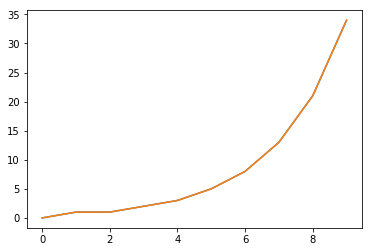

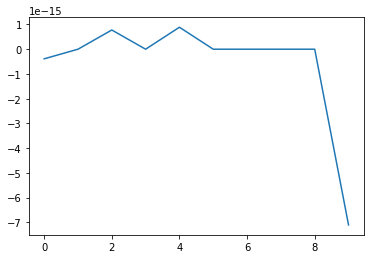

In [30]:
from random import random

def sum_exp(x, d, e, f, g):
    return d * e**x + f * g**x

def sum_exp_fibo(x):
    for i in range(x):
        yield sum_exp(
            i,
            1/np.sqrt(5),
            (1+np.sqrt(5))/2,
            -1/np.sqrt(5),
            (1-np.sqrt(5))/2
        )

def fibo(x):
    old = -1
    new = 1
    for _ in range(x):
        old, new = new, old + new
        yield new
        
up_to = 10
xs = [i for i in range(up_to)]
ys = [i for i in fibo(up_to)]

print ys
print [i for i in sum_exp_fibo(up_to)]


popt, pcov = curve_fit(sum_exp, xs, ys, p0=(
    random(), random(), random(), random()
))
print popt
print pcov

plt.plot(xs, ys, label='original')
plt.plot(xs, sum_exp(xs, *popt), label='fit')
plt.show()

plt.plot(xs, ys - sum_exp(xs, *popt))
plt.show()

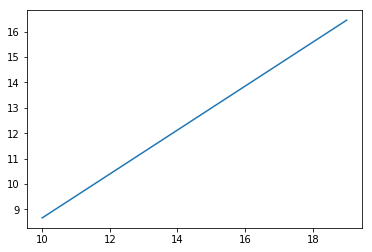

[ 1.00003827  2.37743717]
[[  1.76615460e-10  -2.78636306e-11]
 [ -2.78636306e-11   4.56837902e-12]]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in log


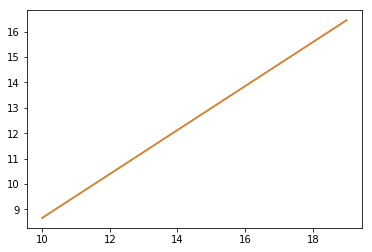

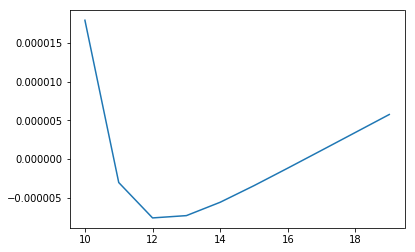

In [11]:
xs = np.array(range(10, 20))
ys = [mean_solved_time_numpy(i) for i in xs]

p = np.polyfit(xs, ys, 2)

p[0] = .25
p[1] = 0
p[2] = -.25

poly_ys = np.polyval(p, xs)

error_ys = ys - poly_ys

plt.plot(xs, error_ys)
plt.show()

from random import random

def fit_sum_exp(x, d, e, f, g):
    return d * e**x + f * g**x
def fit_exp(x, d, e):
    return d * e**x
def fit_exp_poly(x, d, e, f, g, h):
    return (d*np.power(x, 2) + e*x + f)**(g*x + h)
def fit_exp_rat(x, d, e, f, g):
    return d * e**x + f/(x+g)
def fit_simple_rat(x, f, g):
    return f/(x+g)
def fit_exp_times_x(x, f, g):
    return np.log(f * x * (g**x))
def fit_exp_times_x_plus_exp(x, f, g, h, i):
    return np.log(f * x * (g**x) + h * (i**x))
def fit_exp_times_x_at_sqrt_3(x, f):
    return np.log(np.sqrt(3) * x * (f**x))
def fit_exp_times_x_plus_exp_at_vals(x, h, i):
    return np.log(np.sqrt(3) * x * ((2-np.sqrt(3))**x) + h * (i**x))

def wiggling_(x, h, i):
    return np.log(np.sqrt(3) * x * ((2-np.sqrt(3))**x) + h * (i**x))

fitting_function = fit_exp_times_x_plus_exp_at_vals
p0 = [random(), random()]

popt, pcov = curve_fit(fitting_function, xs, error_ys, p0=p0)
print popt
print pcov

plt.plot(xs, error_ys, label='original')
plt.plot(xs, fitting_function(xs, *popt))
plt.show()

plt.plot(xs, error_ys - fitting_function(xs, *popt))
plt.show()

In [49]:
# reasoning: it's probably some algebraic expression like t = (sqrt(3)+a)/b
# therefore, (t*b - a)**2 = 3
eps = 0.1
for a in range(-100, 100):
    for b in range(-100, 100):
        t = (0.26795498*b - a)**2
        if abs(t - 3) < eps:
            print "try t = (sqrt(3) + {a})/{b}".format(a=a, b=b),
            print "eps is {}".format(t - 3)

try t = (sqrt(3) + -28)/-98 eps is 0.029033790511
try t = (sqrt(3) + -24)/-96 eps is -0.0289338765275
try t = (sqrt(3) + -24)/-83 eps is 0.0966731125479
try t = (sqrt(3) + -21)/-72 eps is -0.0853266655467
try t = (sqrt(3) + -20)/-81 eps is -0.0951795560826
try t = (sqrt(3) + -17)/-70 eps is 0.086517003322
try t = (sqrt(3) + -17)/-57 eps is -0.0189693642055
try t = (sqrt(3) + -13)/-55 eps is 0.0189893030712
try t = (sqrt(3) + -13)/-42 eps is 0.0481348251959
try t = (sqrt(3) + -9)/-40 eps is -0.0477915091194
try t = (sqrt(3) + -6)/-16 eps is -0.0665891054591
try t = (sqrt(3) + -2)/-14 eps is 0.0672958961329
try t = (sqrt(3) + -2)/-1 eps is -2.00486931998e-05
try t = (sqrt(3) + 2)/1 eps is -2.00486931998e-05
try t = (sqrt(3) + 2)/14 eps is 0.0672958961329
try t = (sqrt(3) + 6)/16 eps is -0.0665891054591
try t = (sqrt(3) + 9)/40 eps is -0.0477915091194
try t = (sqrt(3) + 13)/42 eps is 0.0481348251959
try t = (sqrt(3) + 13)/55 eps is 0.0189893030712
try t = (sqrt(3) + 17)/57 eps is -0.01896

In [4]:
# reasoning: it's probably some fraction?
eps = 0.001
t = 0.26795498
candidates = []
for a in range(-100, 100):
    for b in range(-100, 100):
        if b != 0:
            approx_t = a / float(b)
            if abs(t - approx_t) < eps:
                print "try t = {a}/{b}".format(a=a, b=b),
                print "eps is {}".format(t - approx_t)

try t = -26/-97 eps is -8.6257113402e-05
try t = -25/-93 eps is -0.000862224301075
try t = -23/-86 eps is 0.000513119534884
try t = -22/-82 eps is -0.000337702926829
try t = -19/-71 eps is 0.000349346197183
try t = -18/-67 eps is -0.00070173641791
try t = -15/-56 eps is 9.78371428572e-05
try t = -11/-41 eps is -0.000337702926829
try t = 11/41 eps is -0.000337702926829
try t = 15/56 eps is 9.78371428572e-05
try t = 18/67 eps is -0.00070173641791
try t = 19/71 eps is 0.000349346197183
try t = 22/82 eps is -0.000337702926829
try t = 23/86 eps is 0.000513119534884
try t = 25/93 eps is -0.000862224301075
try t = 26/97 eps is -8.6257113402e-05
